# <font style="color:rgb(50,120,229)">Basic Image operations</font>

1. Cropping images
1. Creating binary masks for images

## <font style="color:rgb(50,120,229)">1. Cropping Images</font>

From the figure, you can see that the face lies somewhere in the region :

* between row #40 to row #200
* between col #170 to col #320

There is no function for doing this, simple python slicing works!

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

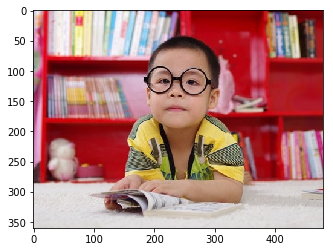

In [3]:
# Read image
image = cv2.imread("DATA/boy.jpg")
plt.imshow(image[:,:,::-1])

**Note:**
- In numpy, the 1st index is for height or row and 2nd one is for width or column i.e in terms of (row,column).
- In OpenCV it is width and height i.e in terms of (x,y).  

In [4]:
# Crop out a rectangle
# x coordinates = 170 to 320
# y coordinates = 40 to 200
crop = image[40:200,170:320]

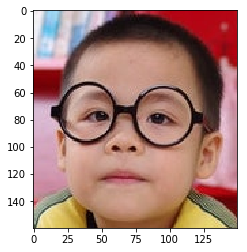

In [5]:
plt.imshow(crop[:,:,::-1])

## <font style="color:rgb(50,120,229)">2. Create a mask using pixel intensity or color</font>

Here's is the logic: If you want to focus on `red pixels`:
```
* The red channel should have high intensity ( keep the range of pixel values from 100 to 255 )
* The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)
```
There is a nice OpenCV function - cv2.inRange which can do exactly this!

**Parameters**
- **`src`** - first input array.
- **`lowerb`** - inclusive lower boundary array or a scalar.
- **`upperb`** - inclusive upper boundary array or a scalar.
- **`dst`** - output array of the same size as src and CV_8U type.

It produces a binary image ( pixels are either black or white ).



Text(0.5,1,'Original Image')

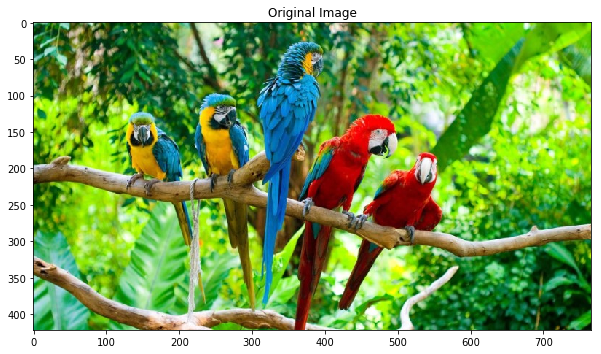

In [6]:
image = cv2.imread("DATA/parrots.jpg")
b_mask = cv2.inRange(image, (100,0,0), (255,100,100))
g_mask = cv2.inRange(image, (0,100,0), (100,255,100))
r_mask = cv2.inRange(image, (0,0,100), (100,100,255))

plt.figure(figsize=[10,10]);plt.imshow(image[...,::-1]);plt.title("Original Image")

Text(0.5,1,'Red Mask')

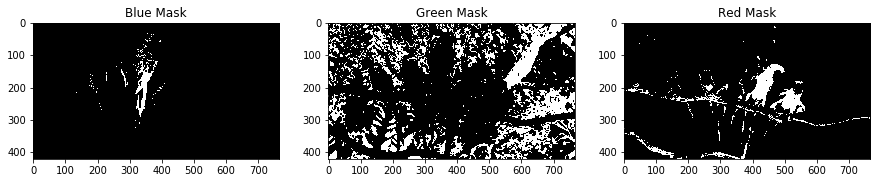

In [7]:
plt.figure(figsize=[15,15])
plt.subplot(131); plt.imshow(b_mask);plt.title("Blue Mask")
plt.subplot(132); plt.imshow(g_mask);plt.title("Green Mask")
plt.subplot(133); plt.imshow(r_mask);plt.title("Red Mask")